In [20]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
#from pandas.tools.plotting import parallel_coordinates

In [21]:
X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0)

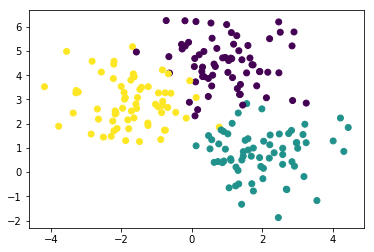

In [22]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [23]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=cols)

y = data['Class']          # Split off classifications
X = data.ix[:, 'Alcohol':] # Split off features

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [24]:
X_norm = (X - X.min())/(X.max() - X.min())

In [25]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

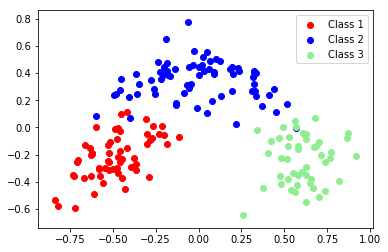

In [26]:
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

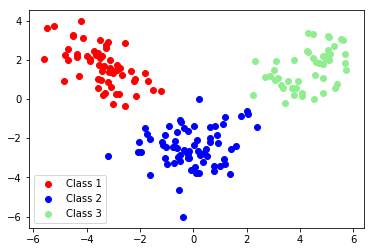

In [27]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))

# Plot all three series
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

In [28]:
lda_transformed.shape

(178, 2)

In [29]:
df = pd.read_csv('data.csv')
df.dropna(axis=0,inplace=True)
y = df['TenYearCHD']#.as_matrix()
scaler = MinMaxScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
X = df.drop(['TenYearCHD'], axis=1)#.as_matrix()


In [32]:
X.shape

(3656, 15)

In [33]:
y.shape

(3656,)

In [36]:
lda = LDA(n_components=3) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

In [37]:
lda_transformed.shape

(3656, 1)

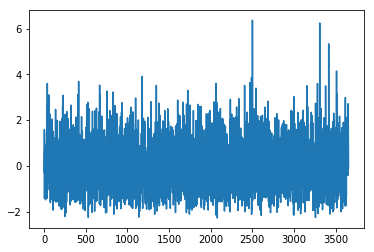

In [38]:
plt.plot(lda_transformed)

In [18]:


# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
#plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match